In [1]:
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo
#import functions as fun

In [2]:
mpl.rcParams['xtick.labelsize']       = 9
mpl.rcParams['ytick.labelsize']       = 9
mpl.rcParams['lines.linewidth']       = 2.
mpl.rcParams['axes.labelsize']        = 9
#mpl.rcParams['axes.labelweight']      = 'bold'
mpl.rcParams['axes.titlesize']        = 9
mpl.rcParams['font.family']           = 'serif'
#mpl.rcParams['axes.titleweight']      = 'bold'
mpl.rcParams['figure.subplot.bottom'] = .01
mpl.rcParams['figure.subplot.top']    = .99
mpl.rcParams['figure.subplot.left']   = .05
mpl.rcParams['figure.subplot.right']  = .99
mpl.rcParams['figure.subplot.wspace'] = .02
mpl.rcParams['figure.subplot.hspace'] = .0
mpl.rcParams['figure.figsize']        = 7,4.5

cols = {}
cols['ocean'] = '.7'
cols['land'] = '.9'

In [3]:
def makeglobal(ax):
    ax.set_global()
    ax.add_feature(cfeature.LAND,color=cols['land'])
    ax.add_feature(cfeature.OCEAN,color=cols['ocean'])
    ax.outline_patch.set_visible(False)

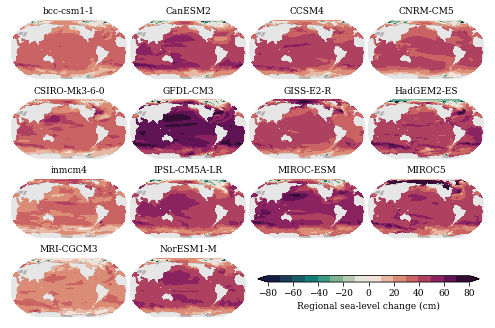

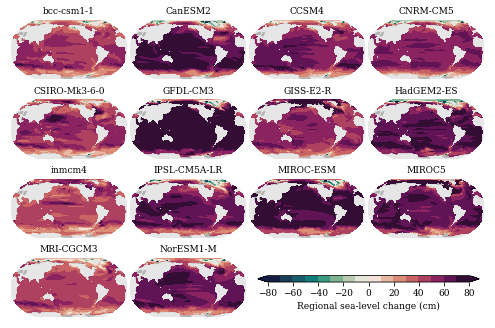

In [4]:
cmap1 = plt.get_cmap('cmo.curl',16)

for scen in ['rcp45','rcp85']:
    fig = plt.figure()
    with xr.open_dataset(f'../data/ensemble_rsl_{scen}.nc') as ds:
        lon = ds['lon']
        lat = ds['lat']
        mods = ds['model'].values
        slr = ds['slr']
        
    for m,model in enumerate(mods):
        ax = fig.add_subplot(4,4,1+m,projection=ccrs.Robinson(central_longitude=200))
        im = ax.pcolormesh(lon,lat,slr[m,:,:],transform=ccrs.PlateCarree(),vmin=-80,vmax=80,cmap=cmap1)
        makeglobal(ax)
        ax.set_title(model)

    cax = fig.add_axes([.54,.15,.44,.02])
    cb = plt.colorbar(im,cax=cax,extend='both',orientation='horizontal')
    cb.set_label('Regional sea-level change (cm)')   


    figname = f'draftplot_ensemble_rsl_{scen}.png'

    plt.savefig(f'../figures/{figname}',dpi=600)
    plt.savefig(f'../../../writing/codependence/figures/{figname}',dpi=600)
    plt.show()
    plt.close()